In [7]:
import pandas as pd

# Load the uploaded datasets
file1_path = '../Results/gemini_with_grounding_results_raw.csv'
file2_path = '../Results/gemini_with_local_dataset_results_raw.csv'

# Reading the datasets
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Display the first few rows of each dataset to understand their structure
dataset1_head = dataset1.head()
dataset2_head = dataset2.head()

dataset1_shape = dataset1.shape
dataset2_shape = dataset2.shape

print(dataset1_shape, dataset2_shape)

(2023, 17) (2022, 17)


In [13]:
# Replace 'No information found' and similar values explicitly
dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)

# Re-check for missing values to confirm the operation
missing_values1 = dataset1.isna().sum()
missing_values2 = dataset2.isna().sum()

print(missing_values1)


Unnamed: 0                    0
id                            0
Firm_Name                     0
Registered_Address          165
CEO                        1191
Establishment_Year         1192
Number_Of_Employees         504
Revenue_Size                865
Website                      28
NAICS_Code                 1539
SIC_Code                   1612
Status                      410
Dissolvement_Year          1404
Company_Type                344
Previous_Names             1363
Alternative_Names          1336
Key_Executive_Personnel    1153
dtype: int64


/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_44885/2253366090.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_44885/2253366090.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)


In [14]:
print(missing_values2)

Unnamed: 0                   0
id                           0
Firm_Name                    0
Registered_Address         339
CEO                        685
Establishment_Year         402
Number_Of_Employees        191
Revenue_Size               504
Website                     99
NAICS_Code                 740
SIC_Code                   693
Status                     276
Dissolvement_Year          127
Company_Type               123
Previous_Names             100
Alternative_Names          100
Key_Executive_Personnel    412
dtype: int64


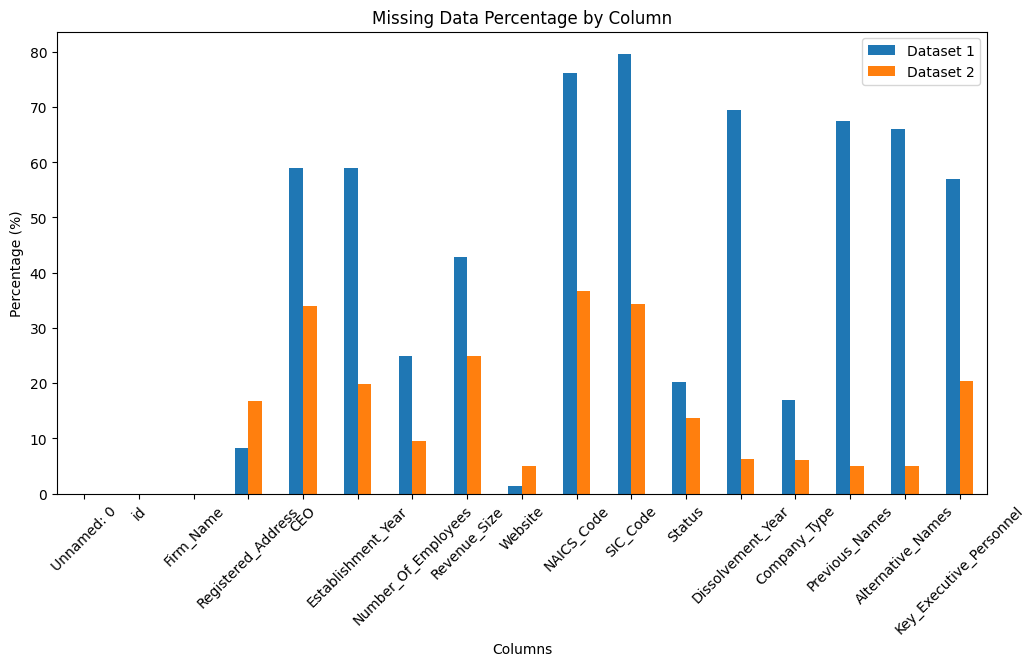

In [16]:
import matplotlib.pyplot as plt

# Percentage of missing values
missing_percentage1 = (dataset1.isna().sum() / len(dataset1)) * 100
missing_percentage2 = (dataset2.isna().sum() / len(dataset2)) * 100

# Bar chart for comparison
missing_comparison = pd.DataFrame({
    'Dataset 1': missing_percentage1,
    'Dataset 2': missing_percentage2
})

missing_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Data Percentage by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [20]:
file3_path = '../Results/opencorporates_reference_data.csv'

# Reading the datasets
reference_data = pd.read_csv(file3_path)

# Create a new column 'State' by extracting the last two characters of 'jurisdiction_code' and capitalizing them
reference_data['State'] = reference_data['jurisdiction_code'].str.split('_').str[-1].str.upper()

# Display the first few rows to verify the new column
reference_data[['jurisdiction_code', 'State']].head()

# Ensure the column names match for merging
dataset1.rename(columns={"Firm_Name": "name"}, inplace=True)
dataset2.rename(columns={"Firm_Name": "name"}, inplace=True)

# Prepare 'name' column for matching by removing excess spaces and normalizing case
dataset1['name'] = dataset1['name'].str.strip().str.upper()
dataset2['name'] = dataset2['name'].str.strip().str.upper()
reference_data['name'] = reference_data['name'].str.strip().str.upper()

# Merge datasets with reference data on 'name'
merged1 = dataset1.merge(reference_data[['name', 'State', 'source', 'registered_address', 'industry_codes']], on='name', how='left')
merged2 = dataset2.merge(reference_data[['name', 'State', 'source', 'registered_address', 'industry_codes']], on='name', how='left')

merged2.head()

,Unnamed: 0,id,name,Registered_Address,CEO,Establishment_Year,Number_Of_Employees,Revenue_Size,Website,NAICS_Code,...,Status,Dissolvement_Year,Company_Type,Previous_Names,Alternative_Names,Key_Executive_Personnel,State,source,registered_address,industry_codes
0,0,1,"""TRACTION POWER SYSTEMS, INC.""","8550 Mosley, Houston, TX, United States, 77075\n",<NA>,1992,<NA>,<NA>,No website found\n,335314,...,Dissolved\n,2001,Foreign For-Profit Corporation\n,N/A\n,"TRACTION POWER SYSTEMS, INC.\n",N/A\n,MD,{'publisher': 'Maryland Department of Assessme...,{'street_address': '8550 MOSLEY DRIVE\nHOUSTON...,[]
1,1,2,"""A DAY TO REMEMBER"", LLC","11 Carolyn Court, Dover, DE, USA, 19901\n",Stephen Hoffman\n,2003,<25\n,$1000000-10000000\n,http://adtr.com/\n,448120,...,Active\n,2024,LLC\n,N/A\n,ADTR\n,"Helen Dionne, Business Owner (A Day To Remembe...",IN,"{'publisher': 'Indiana Secretary of State', 'u...","{'street_address': '1121 S RACE ST, PRINCETON,...",[]
2,2,3,""" MALCO INC. -A NEVADA CORP.","3030 South Atlantic Blvd, Los Angeles, CA, USA...",Joshua Maloney\n,1982,1-10\n,10000-100000\n,http://www.brasstraditions.com/\n,<NA>,...,Inactive\n,N/A\n,Corporation\n,N/A\n,"MALCO ENTERPRISES OF NEVADA, INC.\n","Buddy Malone, Chief Executive Officer; Joe Mal...",CA,"{'publisher': 'California Secretary of State',...","{'street_address': '855 S WELLS,\nRENO, NV 895...",[]
3,3,4,.BISHOP'S GATE RESIDENTIAL MORTGAGE TRUST,"300 Delaware Avenue 9th Floor, Wilmington, DE,...",<NA>,1998,1-10\n,1000000000+\n,No website found\n,522292,...,Active\n,2008,Statutory Trust\n,CENDANT RESIDENTIAL MORTGAGE TRUST\n,CENDANT RESIDENTIAL MORTGAGE TRUST\n,<NA>,SD,{'publisher': 'South Dakota Secretary of State...,NaN,[]
4,4,5,"""J.CRESCI FARMS, L.L.C.""","3815 Hance Bridge Road, Vineland, NJ, USA, 083...",Joseph Cresci\n,2002,1-10\n,100000-1000000\n,No website found\n,111110,...,Active\n,N/A\n,LLC\n,N/A\n,J Cresci Farms LLC\n,N/A\n,NJ,{'publisher': 'State of New Jersey Division of...,NaN,[]


In [21]:
# Filter out rows where either 'State' or 'Registered_Address' is missing
filtered1 = merged1[(merged1['State'] != "") & (merged1['Registered_Address'] != "")]
filtered2 = merged2[(merged2['State'] != "") & (merged2['Registered_Address'] != "")]

# Recalculate the 'State Match' columns with filtered data
filtered1['State Match'] = filtered1.apply(lambda row: row['State'] in str(row['Registered_Address']).upper(), axis=1)
filtered2['State Match'] = filtered2.apply(lambda row: row['State'] in str(row['Registered_Address']).upper(), axis=1)

# Calculate match percentages considering only valid rows
filtered_match_percentage1 = filtered1['State Match'].mean() * 100
filtered_match_percentage2 = filtered2['State Match'].mean() * 100

filtered_match_percentage1, filtered_match_percentage2

(18.49889624724062, 45.22968197879859)